#Objetivo

 >>> Lo vamos a redactar ya que tengamos más claras las preguntas de investigación.

#Carga de librerías y datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

#Preprocesamiento

In [ ]:
#Veamos una muestra del dataset
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [ ]:
#Observemos el dataset de forma transpuesta
df.head(3).T

,0,1,2
Age,41,49,37
Attrition,Yes,No,Yes
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373
Department,Sales,Research & Development,Research & Development
DistanceFromHome,1,8,2
Education,2,1,2
EducationField,Life Sciences,Life Sciences,Other
EmployeeCount,1,1,1
EmployeeNumber,1,2,4


In [ ]:
#Veamos su info básica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Tenemos 26 columnas con valores integer y nueve columnas con valores object. Un memory usage de 402.1+ KB, nada problemático en tamaño, y se observa que no tenemos nulos en las columnas.

In [ ]:
#Busquemos duplicados de entradas en general
df.duplicated().sum()

0

In [ ]:
#Revisemos que no tengamos duplicados en la columna EmployeeNumber específicamente
df['EmployeeNumber'].duplicated().sum()


0

In [ ]:
#Conozcamos si los números de empleado son una secuencia númerica simple o es discontinua
df['EmployeeNumber']

0          1
1          2
2          4
3          5
4          7
        ... 
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: EmployeeNumber, Length: 1470, dtype: int64

In [ ]:
#Busquemos pseudoduplicados, -aquellos valores que podrían significar lo mismo
#pero tienen alguna diferencia ortográfica-, en las columnas object.


results = []

for column in df.columns:
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        results.append({'Columna': column, 'Valores Únicos': unique_values})


results_df = pd.DataFrame(results)
results_df



,Columna,Valores Únicos
0,Attrition,"[Yes, No]"
1,BusinessTravel,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
2,Department,"[Sales, Research & Development, Human Resources]"
3,EducationField,"[Life Sciences, Other, Medical, Marketing, Tec..."
4,Gender,"[Female, Male]"
5,JobRole,"[Sales Executive, Research Scientist, Laborato..."
6,MaritalStatus,"[Single, Married, Divorced]"
7,Over18,[Y]
8,OverTime,"[Yes, No]"


Las etiquetas usadas en las columnas object se ven adecuadas, no hay psedoduplicados.

Se observa una particularidad: en la columna Over18 solo se tiene el valor "Y" que significa que el empleado sí tiene más de 18 años. No hay otro valor usado, ni nulos en la columna por lo que está es una columna que puede ignorarse o removerse. La caracterísitca de la que habla abarca la totalidad del las entradas en el dataset.

In [ ]:
# Obtenemos los nunique de cada columna
nunique_values = df.nunique()
nunique_values = pd.DataFrame(nunique_values, columns=['nunique'])
nunique_values


,nunique
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


Las columnas que tienen un solo valor son:


* EmployeeCount
* OVer18
* StandardHours

No brindan aporte por lo que se eliminarán del dataset.



In [ ]:
df = df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'])
df.shape

(1470, 32)

In [ ]:
#Se convierten las columnas object en category
df.loc[:,df.dtypes =='object'] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
#corroboremos el cambio
df.dtypes

<ipython-input-12-6c43437371bb>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,df.dtypes =='object'] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))


Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
W

In [ ]:
#veamos la descripción estadística
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0


# EDA: Análisis exploratorio de datos

In [ ]:
#Separemos el df en dos según el desgaste
yes_attrition = df.loc[df['Attrition']=='Yes']
yes_attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,19,3,...,3,2,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,27,3,...,4,2,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,31,2,...,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,2023,4,...,3,1,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,2027,1,...,3,2,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,2032,4,...,3,4,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,2044,2,...,3,4,2,12,3,3,6,3,0,1


In [ ]:
#Ahora vamos con el NO en attrition
no_attrition = df.loc[df['Attrition']=='No']
no_attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,4,...,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,10,3,...,4,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


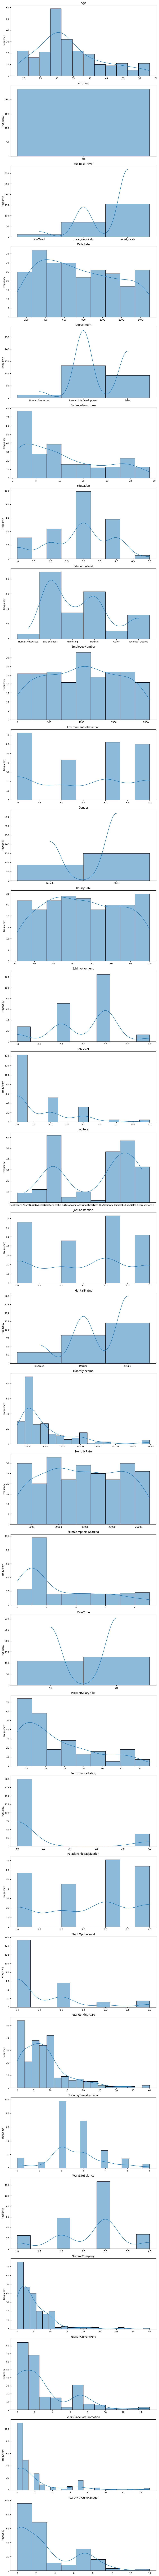

In [ ]:
#Veamos que ofrece yes_attrition en cada una de las columnas


# Crear la figura y los ejes
fig, axes = plt.subplots(len(yes_attrition.columns), 1, figsize=(10, len(yes_attrition.columns)*5))

# Iterar sobre las columnas y crear un gráfico para cada una
for i, col in enumerate(yes_attrition.columns):
    if yes_attrition[col].dtype == 'object':
        sns.countplot(data=yes_attrition, x=col, ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
    else:
        sns.histplot(data=yes_attrition, x=col, ax=axes[i], kde=True)
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frequency')

# Ajustar el diseño y mostrar las gráficas
plt.tight_layout()
plt.show()

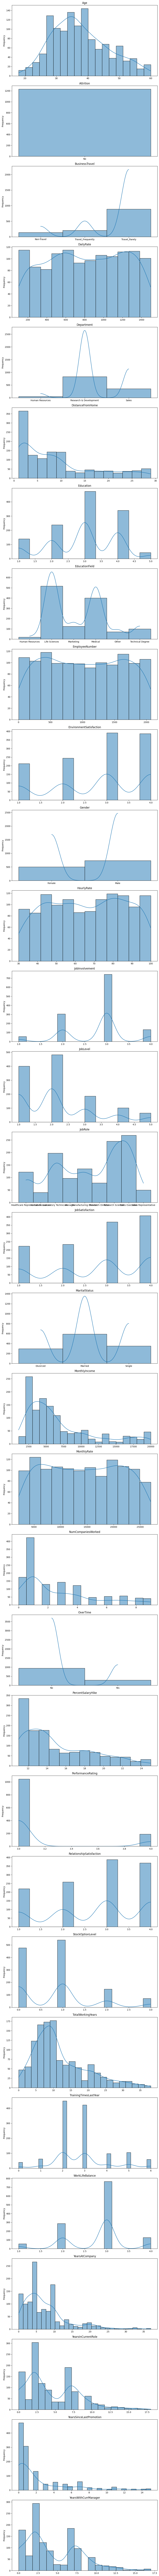

In [ ]:
#Veamos que ofrece no_attrition en cada una de las columnas


# Crear la figura y los ejes
fig, axes = plt.subplots(len(no_attrition.columns), 1, figsize=(10, len(no_attrition.columns)*5))

# Iterar sobre las columnas y crear un gráfico para cada una
for i, col in enumerate(no_attrition.columns):
    if no_attrition[col].dtype == 'object':
        sns.countplot(data=no_attrition, x=col, ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
    else:
        sns.histplot(data=no_attrition, x=col, ax=axes[i], kde=True)
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frequency')

# Ajustar el diseño y mostrar las gráficas
plt.tight_layout()
plt.show()

In [ ]:
#df.to_csv('data.csv')

In [ ]:
df.dtypes


Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
W

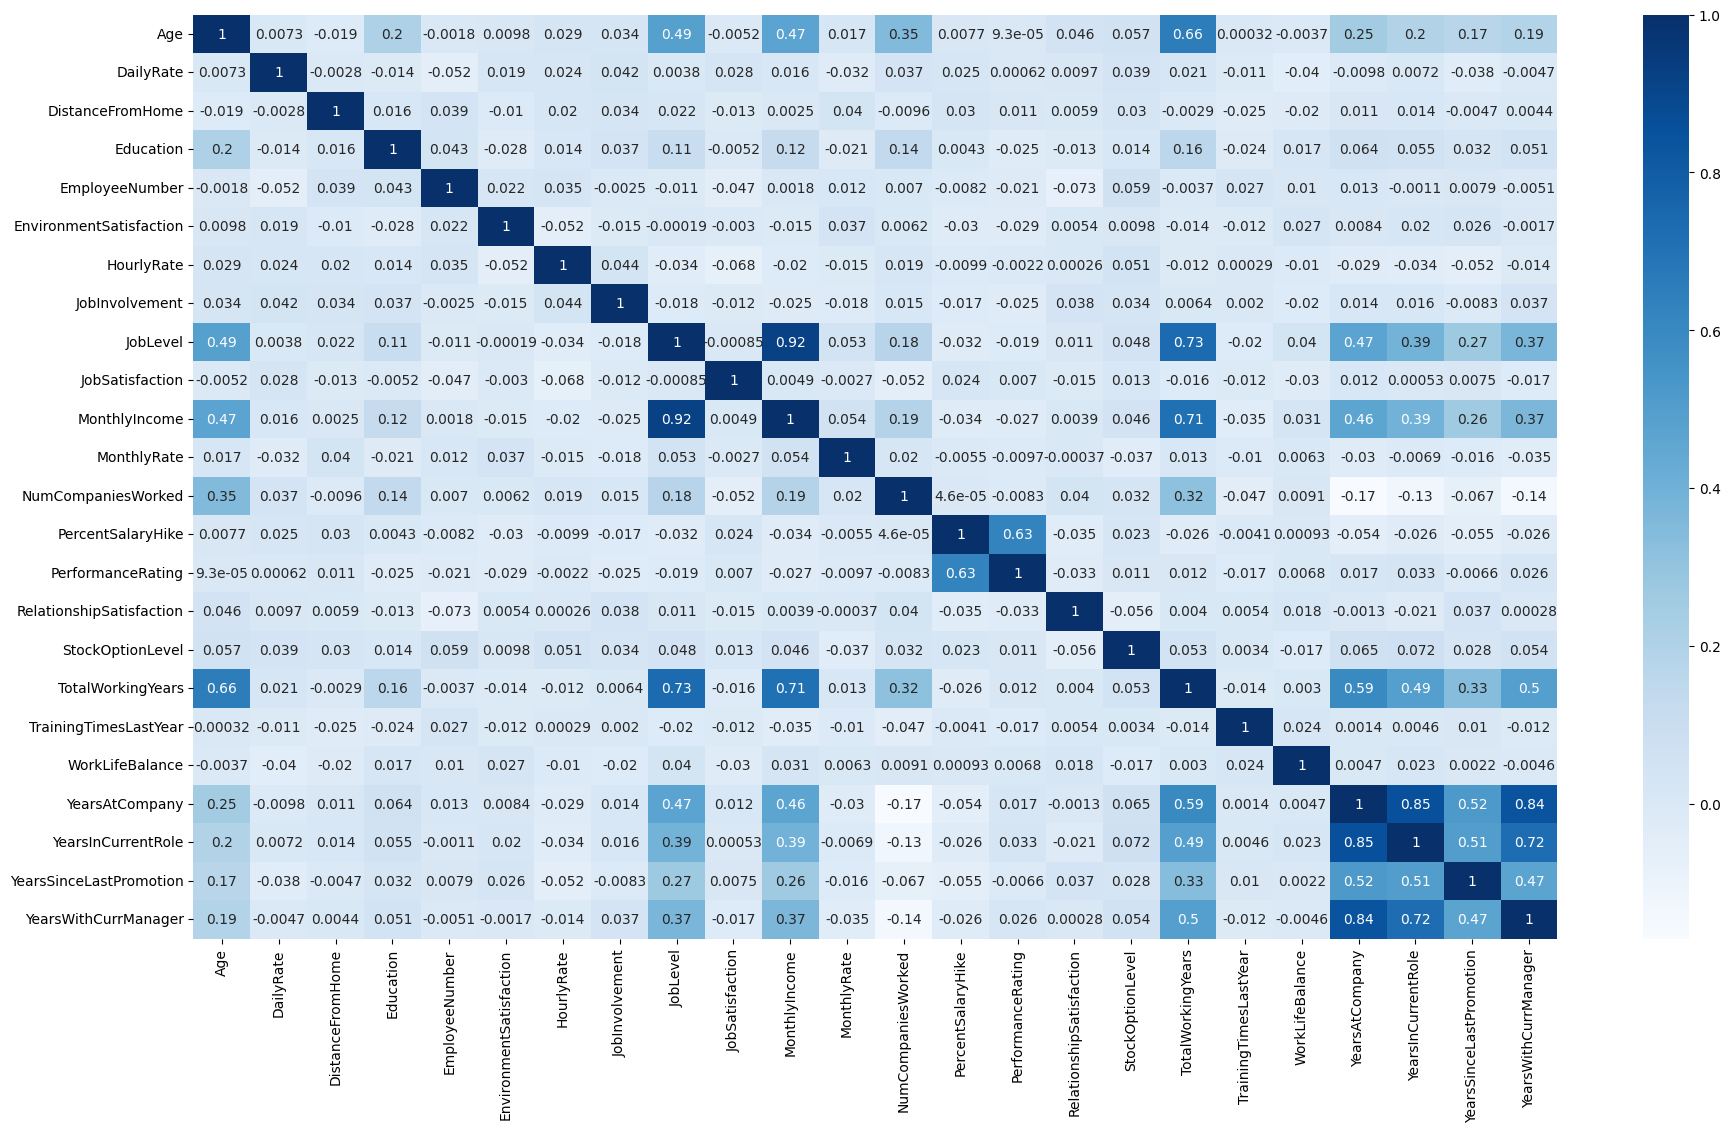

In [ ]:
#Correlación de variables independientes Numericas.

df_corr = df.corr(method="spearman", numeric_only=True)

plt.figure(figsize=(22, 12))


sns.heatmap(df_corr, annot=True, cmap="Blues")
plt.show()

In [ ]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
df.dtypes


Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
W

In [ ]:
df.iloc[:,[6,7]].head(45)

,Education,EducationField
0,2,Life Sciences
1,1,Life Sciences
2,2,Other
3,4,Life Sciences
4,1,Medical
5,2,Life Sciences
6,3,Medical
7,1,Life Sciences
8,3,Life Sciences
9,3,Medical
